#### Tugas 1 - Machine Learning

#### Kelompok 9

#### Anggota Kelompok:
1. **2208107010012** Fazhira Rizky Harmayani
2. **2208107010027** Cut Dahliana
3. **2208107010043** Naufal Aqil
4. **2208107010063** Hidayat Nur Hakim
5. **2208107010086** Riska Haqika Situmorang

#### Deskripsi Tugas
Tugas ini merupakan tugas pertama dalam mata kuliah Machine Learning. Setiap kelompok bekerja dengan dataset dari sumber open source seperti Kaggle atau Hugging Face. Tujuan utama tugas ini adalah memahami proses persiapan data sebelum digunakan dalam analisis atau pelatihan model machine learning.

Kelompok 9 memilih dataset dari Kaggle yang dapat diakses melalui link berikut: [PRSA Data Aotizhongxin (2013-2017)](https://www.kaggle.com/datasets/shaviranurfadhilla/prsa-data-aotizhongxin-2013-2017).

**Kelompok 9 - Machine Learning 2025**

#### Data Understanding
Melakukan data understanding sebelum preprocessing penting karena membantu kita memahami struktur, distribusi, dan kualitas data, sehingga dapat menghindari kesalahan dalam penanganan seperti menghapus data yang sebenarnya penting atau menerapkan metode preprocessing yang tidak sesuai. Tanpa pemahaman awal, kita berisiko menghilangkan informasi berharga, salah menangani outlier atau missing values, dan membuat model yang kurang akurat.

##### Mengekstrak dan Membaca Data|

#####  Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Penjelasan <br>
Kode ini menggunakan beberapa library penting untuk analisis dan pemrosesan data. Pandas digunakan untuk manipulasi data, sementara NumPy membantu dalam perhitungan numerik seperti kuartil untuk deteksi outlier. Matplotlib dan Seaborn digunakan untuk visualisasi data, seperti membuat boxplot untuk mendeteksi outlier. Terakhir, MinMaxScaler dari Scikit-learn digunakan untuk normalisasi data agar berada dalam rentang 0 hingga 1, sehingga memudahkan analisis lebih lanjut atau penerapan dalam model machine learning.

In [2]:
# Memuat dataset
df = pd.read_csv("./data/PRSA_Data_Aotizhongxin.csv")

##### Pertama Lihat Struktur Data

In [3]:
# Lihat Struktur Data
print("Struktur Data:")
print(df.info())

Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


Penjelasan <br>
Dataset ini terdiri dari 35.064 entri dengan 18 kolom yang mencakup berbagai tipe data, yaitu bilangan bulat untuk informasi waktu (tahun, bulan, hari, dan jam), bilangan desimal untuk parameter kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3, suhu, tekanan, kelembaban, curah hujan, dan kecepatan angin), serta tipe objek untuk arah angin dan lokasi stasiun, dengan beberapa kolom memiliki nilai yang hilang terutama pada variabel pencemar udara.

##### Kedua Cek Missing Values

In [4]:
# Cek Missing Values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Penjelasan<br>
Dataset ini memiliki beberapa nilai yang hilang terutama pada variabel pencemar udara seperti PM2.5, PM10, SO2, NO2, CO, dan O3 dengan jumlah yang bervariasi, sedangkan variabel cuaca seperti suhu, tekanan, kelembaban, dan curah hujan hanya memiliki sedikit nilai yang hilang, serta kolom arah angin dan kecepatan angin juga mengalami kekurangan data, sementara informasi waktu dan lokasi stasiun tidak memiliki nilai yang hilang.

##### Ketiga Statistik Deskriptif

In [5]:
# Statistik Deskriptif
print("\n Statistik Deskriptif:")
print(df.describe())


 Statistik Deskriptif:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.

Penjelasan<br>
Statistik deskriptif menunjukkan ringkasan numerik dari dataset, termasuk jumlah data yang tersedia untuk setiap variabel, nilai rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil, di mana terlihat bahwa variabel pencemar udara seperti PM2.5, PM10, SO2, NO2, CO, dan O3 memiliki distribusi yang bervariasi dengan beberapa nilai ekstrem, sementara variabel cuaca seperti suhu, tekanan udara, titik embun, curah hujan, dan kecepatan angin menunjukkan rentang nilai yang lebih stabil tetapi tetap memiliki variasi signifikan.

##### Keempat Visualisasi Distribusi Data

In [6]:
# Simpan kolom non-numerik ke variabel terpisah
df_categorical = df[['wd', 'station']].copy()
# Pisahkan hanya kolom numerik untuk analisis korelasi
df_numeric = df.select_dtypes(include=['number'])

Penjelasan <br>
Kode berikut bertujuan untuk memastikan bahwa hanya fitur numerik yang digunakan dalam analisis korelasi, karena metode korelasi seperti Pearson hanya berlaku untuk data numerik. df_categorical meyimpan kolom 'wd' dan 'station' agar tidak ikut dalam perhitungan korelasi. df_numeric berisi hanya fitur numerik dari dataset, yang akan digunakan dalam perhitungan korelasi antar fitur.

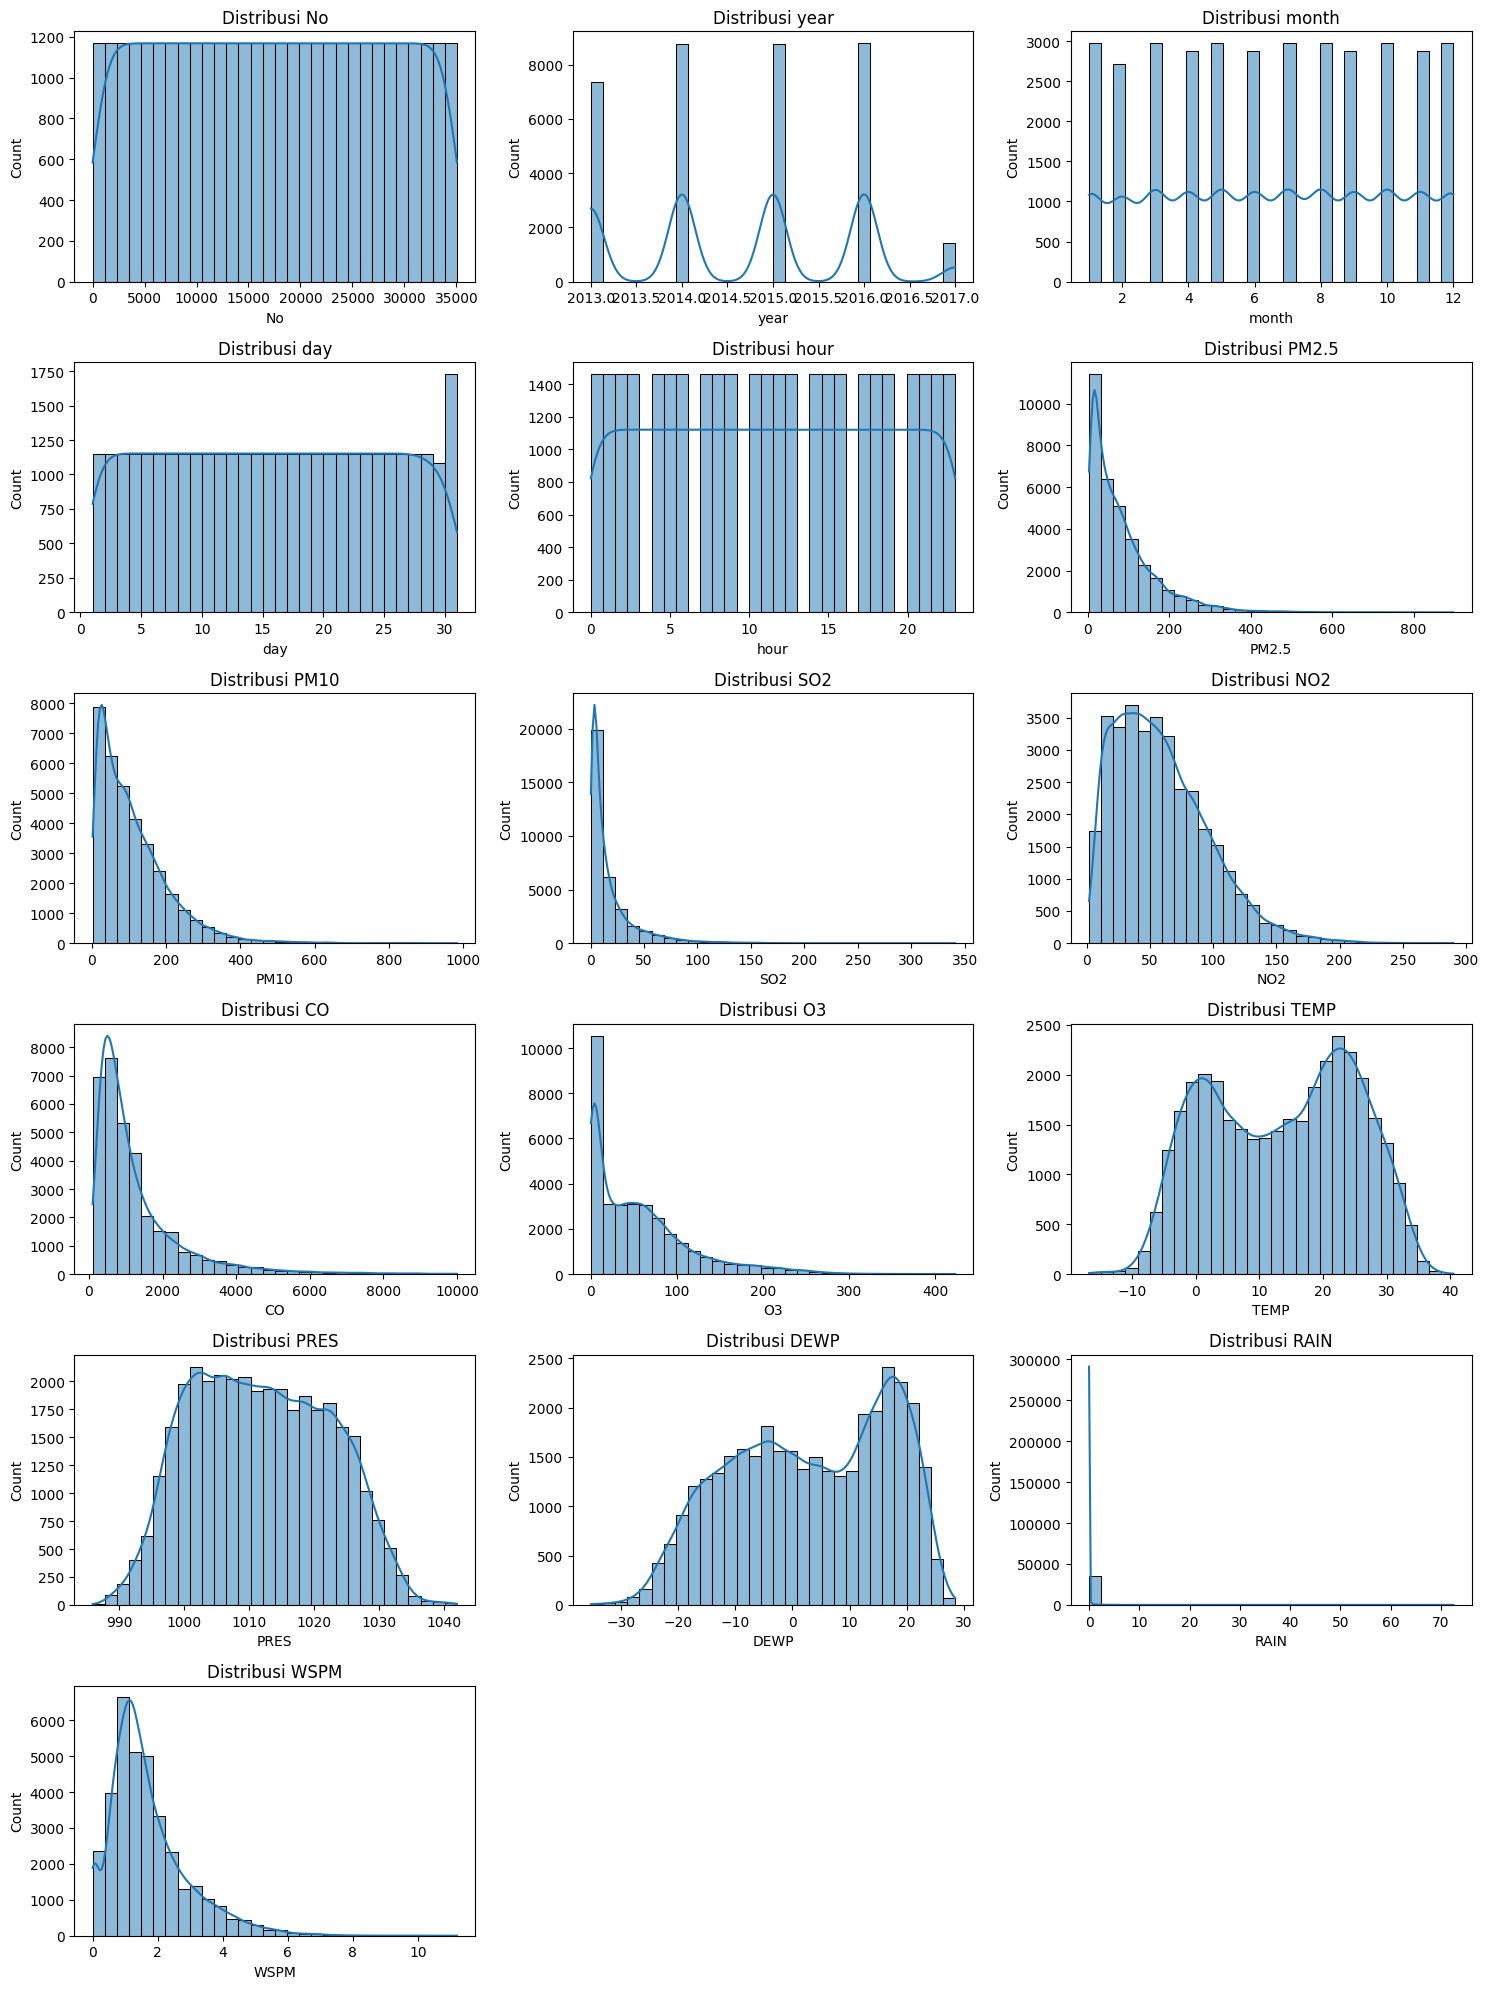

In [7]:
# Buat subplot untuk setiap kolom numerik
plt.figure(figsize=(15, 20))
for i, col in enumerate(df_numeric, 1):
    plt.subplot(6, 3, i)  # Menyesuaikan jumlah baris dan kolom (6x3 agar muat 18 kolom)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")

plt.tight_layout()  
plt.show()

Penjelasan <br>
Visualisasi distribusi data ini menunjukkan sebaran nilai dari setiap variabel numerik dalam dataset, di mana beberapa variabel seperti **PM2.5, PM10, SO2, NO2, CO, dan O3** memiliki distribusi yang cenderung **skewed ke kanan**, mengindikasikan adanya beberapa nilai ekstrem atau outlier. Sementara itu, variabel seperti **TEMP, PRES, dan DEWP** tampak lebih mendekati distribusi normal dengan pola sebaran yang lebih simetris, sedangkan **RAIN** memiliki distribusi yang sangat tidak merata dengan mayoritas nilai terkonsentrasi di nol.

##### Kelima Visualisasi Boxplot untuk Mendeteksi Outlier

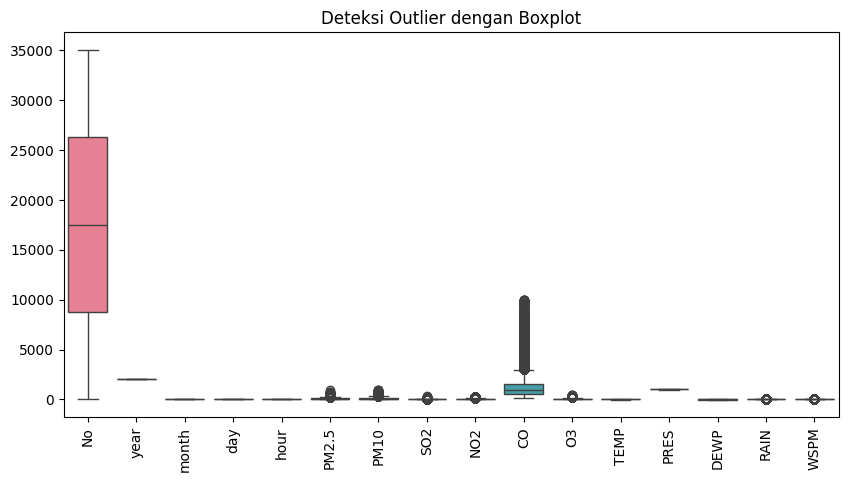

In [8]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

Penjelasan <br>
Visualisasi boxplot ini menunjukkan adanya outlier pada beberapa variabel, terutama pada **PM2.5, PM10, SO2, NO2, CO, dan O3**, di mana nilai ekstrem terlihat menyimpang jauh dari batas interkuartil. Selain itu, deteksi outlier ini masih dipengaruhi oleh **missing value** dalam dataset, yang dapat menyebabkan analisis kurang akurat jika tidak ditangani dengan baik sebelum proses lebih lanjut.

#### Tahap Preprocessing Data

##### Korelasi Antar Fitur

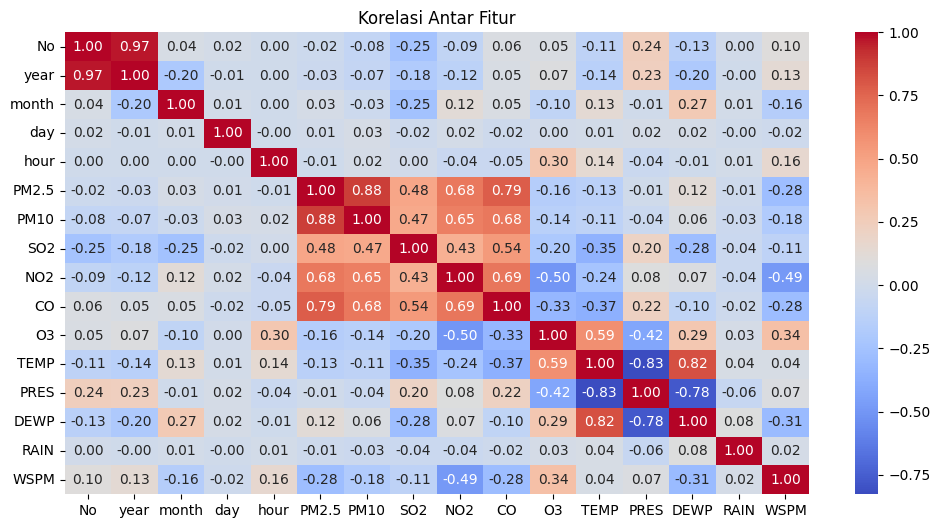

In [9]:
# Hitung korelasi antar fitur numerik
correlation_matrix = df_numeric.corr(method='pearson')

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# Jika ingin menggabungkan kembali setelah analisis, gunakan:
df_final = pd.concat([df_numeric, df_categorical], axis=1)

Penjelasan <br>
Heatmap korelasi yang menunjukkan hubungan antara berbagai fitur numerik dalam dataset. Warna dalam heatmap ini mencerminkan seberapa kuat hubungan antara satu fitur dengan fitur lainnya, dengan nilai korelasi berkisar antara -1 hingga 1.<br>
Dari heatmap ini, terlihat bahwa ada beberapa fitur yang memiliki korelasi tinggi. Misalnya, kadar PM2.5 dan PM10 memiliki korelasi sebesar 0.88, yang berarti jika kadar PM2.5 meningkat, kadar PM10 juga cenderung meningkat. Demikian pula, kadar karbon monoksida (CO) dan nitrogen dioksida (NO2) menunjukkan hubungan yang cukup erat dengan korelasi sebesar 0.69. Hal ini mengindikasikan bahwa polutan tersebut sering ditemukan bersama di udara, mungkin karena berasal dari sumber yang sama seperti emisi kendaraan atau industri.<br>
Selain korelasi positif, terdapat juga korelasi negatif yang signifikan. Misalnya, tekanan udara (PRES) dan suhu udara (TEMP) memiliki korelasi sebesar -0.83, yang berarti ketika tekanan udara tinggi, suhu cenderung lebih rendah.<br>
Namun, ada juga fitur-fitur yang tidak memiliki hubungan yang kuat satu sama lain. Sebagai contoh, hubungan antara bulan dalam setahun dan kadar NO2 memiliki korelasi sebesar -0.12, yang menunjukkan bahwa faktor musiman mungkin tidak terlalu berpengaruh pada tingkat polusi ini. Begitu pula hubungan antara waktu dalam sehari dengan kadar PM2.5 yang hanya memiliki korelasi 0.01, mengindikasikan bahwa variasi harian mungkin tidak terlalu berdampak pada kadar partikel tersebut.<br>



#####  Menangani Missing Value

##### Print informasi dataset

In [10]:
# Menampilkan informasi dasar dataset
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   34139 non-null  float64
 6   PM10    34346 non-null  float64
 7   SO2     34129 non-null  float64
 8   NO2     34041 non-null  float64
 9   CO      33288 non-null  float64
 10  O3      33345 non-null  float64
 11  TEMP    35044 non-null  float64
 12  PRES    35044 non-null  float64
 13  DEWP    35044 non-null  float64
 14  RAIN    35044 non-null  float64
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.3 MB
None


Penjelasan <br>
Code di atas untuk mengecek informasi dataset dan juga mengecek missing values dapat dilihat berdasarkan ouput itu bahwa dataset 35.064 & 16 kolom

In [11]:
# Kolom dengan missing values kecil (<100) diimputasi (mengisi)
# Mengisi kolom numerik dengan median tanpa inplace
df_numeric['WSPM'] = df_numeric['WSPM'].fillna(df_numeric['WSPM'].median())


# Disarankan untuk diimputasi dengan median atau interpolasi, karena data polutan udara biasanya memiliki outlier. 
# Mengisi kolom dengan missing values sedang menggunakan median
cols_with_median = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
df_numeric[cols_with_median] = df_numeric[cols_with_median].apply(lambda x: x.fillna(x.median()))

# Mengecek kembali jumlah missing values setelah imputasi
print("Missing values setelah penanganan:")
print(df_numeric.isnull().sum())

Missing values setelah penanganan:
No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64


Penjelasan Bagaimana Menangani Missing Value<br>

Kategori Missing Values:<br>
- Jumlah kecil (< 100) →  WSPM (14)<br>
- Jumlah sedang (100 - 2000) → PM2.5 (925), PM10 (718), SO2 (935), NO2 (1023), O3 (1719)<br>
- Jumlah besar (> 2000) → CO (1776)<br>

Jika missing values kecil (<1% dari total data), imputasi lebih disarankan. Jika banyak (>5-10%), perlu dipertimbangkan apakah dihapus atau diimputasi.<br>

Metode Pengisian Missing Values:<br>
1. Mode untuk Data Kategorikal<br>
   - Kolom wd (arah angin) → diisi dengan mode (nilai paling sering muncul) agar tetap konsisten.<br>
2. Median untuk Data Numerik<br>
   - Kolom WSPM (kecepatan angin) → diisi dengan median, lebih tahan terhadap outlier.<br>
   - Kolom PM2.5, PM10, SO2, dll. → diisi dengan median agar lebih stabil.<br>

Kenapa Kolom CO Tidak Dihapus?<br>
1. Kehilangan Data Jika Dihapus<br>
   - Missing values CO = 17,76% (1.776 dari 35.064 baris).<br>
   - Jika dihapus, informasi dari kolom lain juga akan hilang.<br>
   - Solusi: Lebih baik diimputasi daripada dihapus.<br>
2. Kenapa Menggunakan Median?<br>
   - Alternatif imputasi:<br>
     - Mean (Rata-rata) → Tidak cocok karena rentan terhadap outlier.<br>
     - Median (Nilai Tengah) → Lebih robust dan stabil.<br>
   - Kesimpulan: Median lebih cocok untuk CO dibandingkan mean.<br>
3. Kapan Kolom Sebaiknya Dihapus?<br>
   - Jika missing values > 40-50%, kolom lebih baik dihapus.<br>
   - Jika hanya 17,76%, masih layak diimputasi.<br>

Kesimpulan Akhir:<br>
- Mode untuk wd agar tetap konsisten.<br>
- Median untuk WSPM, CO, dll. agar lebih tahan terhadap outlier.<br>
- Kolom CO tidak dihapus karena masih memiliki 82% data.<br>
- Jika missing values > 50%, baru dipertimbangkan untuk dihapus.<br>
#####  Mengecek Data Duplikat

In [12]:
df_numeric.duplicated().sum()

0

Penjelasan <br>
Dapat dilihat untuk dataset tersebut tidak terdapat data duplikat

#####  Normalisasi Data

In [13]:
# Inisialisasi scaler untuk masing-masing dataset
scaler = MinMaxScaler()

# Daftar kolom numerik yang akan dinormalisasi
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalisasi dataset train (fit dan transform di train)
df_numeric[num_cols] = scaler.fit_transform(df_numeric[num_cols])

Penjelasan <br>
Normalisasi diperlukan karena dataset memiliki variabel dengan skala berbeda (misalnya, konsentrasi polutan dalam µg/m³, suhu dalam °C, dan tekanan dalam hPa), yang dapat menyebabkan algoritma machine learning lebih condong ke fitur dengan nilai besar. Selain itu, normalisasi meningkatkan performa model dengan memastikan semua fitur berada dalam rentang yang sama, mempercepat konvergensi, dan menghindari bias dalam algoritma berbasis jarak seperti KNN dan SVM.

#####  Mendektesi Outlier

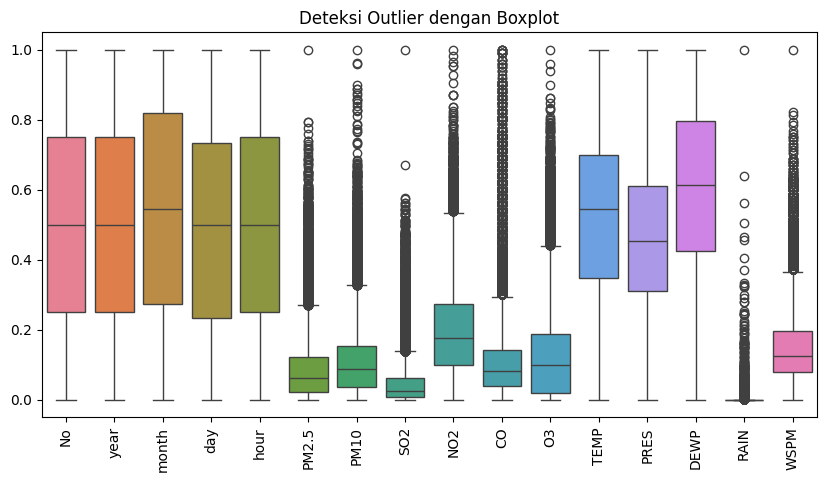

In [14]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [15]:
# Daftar kolom yang akan dicek outliernya
outlier_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

# Fungsi untuk menghitung jumlah outlier
def count_outliers_iqr(df_numeric, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = np.quantile(df_numeric[col], 0.25)
        Q3 = np.quantile(df_numeric[col], 0.75)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df_numeric[(df_numeric[col] < min_IQR) | (df_numeric[col] > max_IQR)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

# Hitung jumlah outlier pada dataset
outlier_counts = count_outliers_iqr(df_numeric, outlier_cols)
print(outlier_counts)


{'PM2.5': 1768, 'PM10': 1162, 'SO2': 3167, 'NO2': 566, 'CO': 2607, 'O3': 1491, 'RAIN': 1380, 'WSPM': 1742}


In [16]:
total_data = len(df_numeric)
outlier_counts = {'PM2.5': 1768, 'PM10': 1162, 'SO2': 3167, 'NO2': 566, 'CO': 2607, 'O3': 1491, 'RAIN': 1380, 'WSPM': 1742}

for col, count in outlier_counts.items():
    percentage = (count / total_data) * 100
    print(f"{col}: {count} outliers ({percentage:.2f}%)")


PM2.5: 1768 outliers (5.04%)
PM10: 1162 outliers (3.31%)
SO2: 3167 outliers (9.03%)
NO2: 566 outliers (1.61%)
CO: 2607 outliers (7.43%)
O3: 1491 outliers (4.25%)
RAIN: 1380 outliers (3.94%)
WSPM: 1742 outliers (4.97%)


Kategori Outlier Berdasarkan Persentase
Sedikit (<5%) → Bisa dihapus langsung:
- PM10 (3.31%)
- NO2 (1.61%)
- O3 (4.25%)
- RAIN (3.94%)
- WSPM (4.97%)

Sedang (5-10%) → Perlu dipertimbangkan (hapus atau imputasi):
- PM2.5 (5.04%)
- SO2 (9.03%)
- CO (7.43%)



In [17]:
def cap_outliers(df_numeric, columns):
    for column in columns:
        Q1 = df_numeric[column].quantile(0.25)
        Q3 = df_numeric[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Ganti nilai outlier dengan batas bawah dan atas
        df_numeric[column] = df_numeric[column].clip(lower=lower_bound, upper=upper_bound)

    return df_numeric

# Kolom numerik yang mengandung outlier
feature_num = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']

# Menangani outlier dengan metode capping
df_numeric = cap_outliers(df_numeric, feature_num)


Penjelasan<br>
Capping (pemotongan outlier) menggunakan metode Interquartile Range (IQR).
1. Menghitung Q1 dan Q3

   - Q1 (kuartil pertama): Nilai persentil ke-25 dari data.
   - Q3 (kuartil ketiga): Nilai persentil ke-75 dari data.
   - IQR (Interquartile Range): Rentang antara Q1 dan Q3.

2. Menentukan batas bawah dan atas menggunakan rumus:

   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   $$

   $$
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$

3. Mengganti nilai yang berada di luar batas tersebut dengan batas bawah atau batas atas menggunakan fungsi `clip()`:

   ```python
   df_numeric[column] = df_numeric[column].clip(lower=lower_bound, upper=upper_bound)
   ```
kode ini mengatasi outlier dengan menggantinya ke nilai yang masih dalam batas wajar. Dengan metode ini, distribusi data tetap lebih stabil dibandingkan dengan:
- Menghapus data yang memiliki outlier (yang bisa menyebabkan kehilangan informasi).
- Melakukan imputasi dengan nilai rata-rata atau median.

Jika ingin mempertahankan outlier dalam kategori sedang (5-10%) untuk diimputasi alih-alih dicapping, kode bisa dimodifikasi agar hanya menerapkan metode ini pada kategori sedikit (<5%) dan menggunakan pendekatan lain seperti mean/median untuk kategori sedang (5-10%).

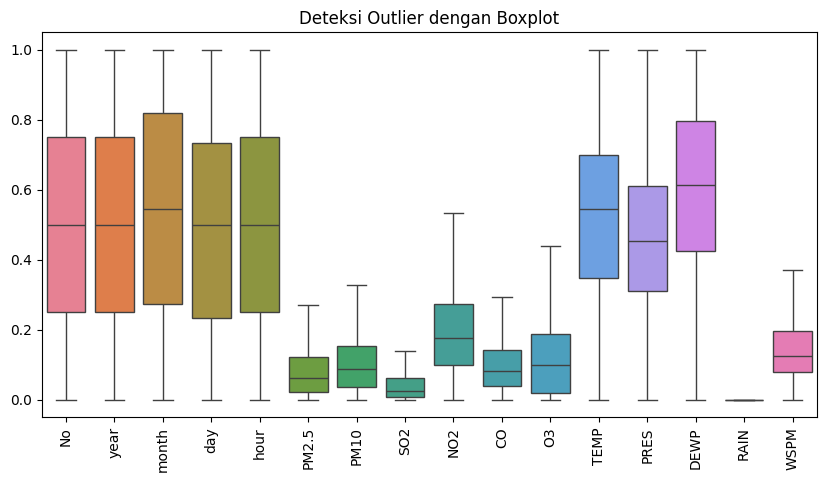

In [18]:
# Visualisasi boxplot untuk semua kolom numerik
plt.figure(figsize=(10,5))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  # Rotasi label agar lebih mudah dibaca
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

In [19]:
# Daftar kolom yang akan dicek outliernya
outlier_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "RAIN", "WSPM"]

# Fungsi untuk menghitung jumlah outlier
def count_outliers_iqr(df_numeric, cols):
    outlier_counts = {}
    for col in cols:
        Q1 = np.quantile(df_numeric[col], 0.25)
        Q3 = np.quantile(df_numeric[col], 0.75)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = df_numeric[(df_numeric[col] < min_IQR) | (df_numeric[col] > max_IQR)]
        outlier_counts[col] = len(outliers)
    
    return outlier_counts

# Hitung jumlah outlier pada dataset
outlier_counts = count_outliers_iqr(df_numeric, outlier_cols)
print(outlier_counts)


{'PM2.5': 0, 'PM10': 0, 'SO2': 0, 'NO2': 0, 'CO': 0, 'O3': 0, 'RAIN': 0, 'WSPM': 0}


Penjelasan <br>
Setelah dilakukan penanganan outlier menggunakan metode capping dengan IQR, hasil analisis menunjukkan bahwa jumlah outlier dalam dataset untuk semua kolom yang dicek (PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM) menjadi nol.  

Hal ini berarti bahwa semua nilai yang sebelumnya dianggap sebagai outlier telah berhasil dikonversi ke dalam rentang yang wajar berdasarkan batas bawah (Q1 - 1.5 × IQR) dan batas atas (Q3 + 1.5 × IQR). Dengan kata lain, tidak ada lagi data yang berada di luar batas yang ditentukan.  

Dengan metode ini, distribusi data tetap lebih stabil dibandingkan dengan menghapus outlier secara langsung, sehingga dataset tetap dapat digunakan untuk analisis lebih lanjut tanpa kehilangan informasi yang signifikan.